主成分的权重:
   rain_nor  slope_nor  NDVI_nor   evp_nor   SSD_nor   GST_nor
0  0.109996   0.047510  0.795330  0.361922 -0.435947  0.179044
1 -0.392539  -0.212957  0.558449 -0.353979  0.602824  0.000315


D:\Software\DevelopmentKit\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


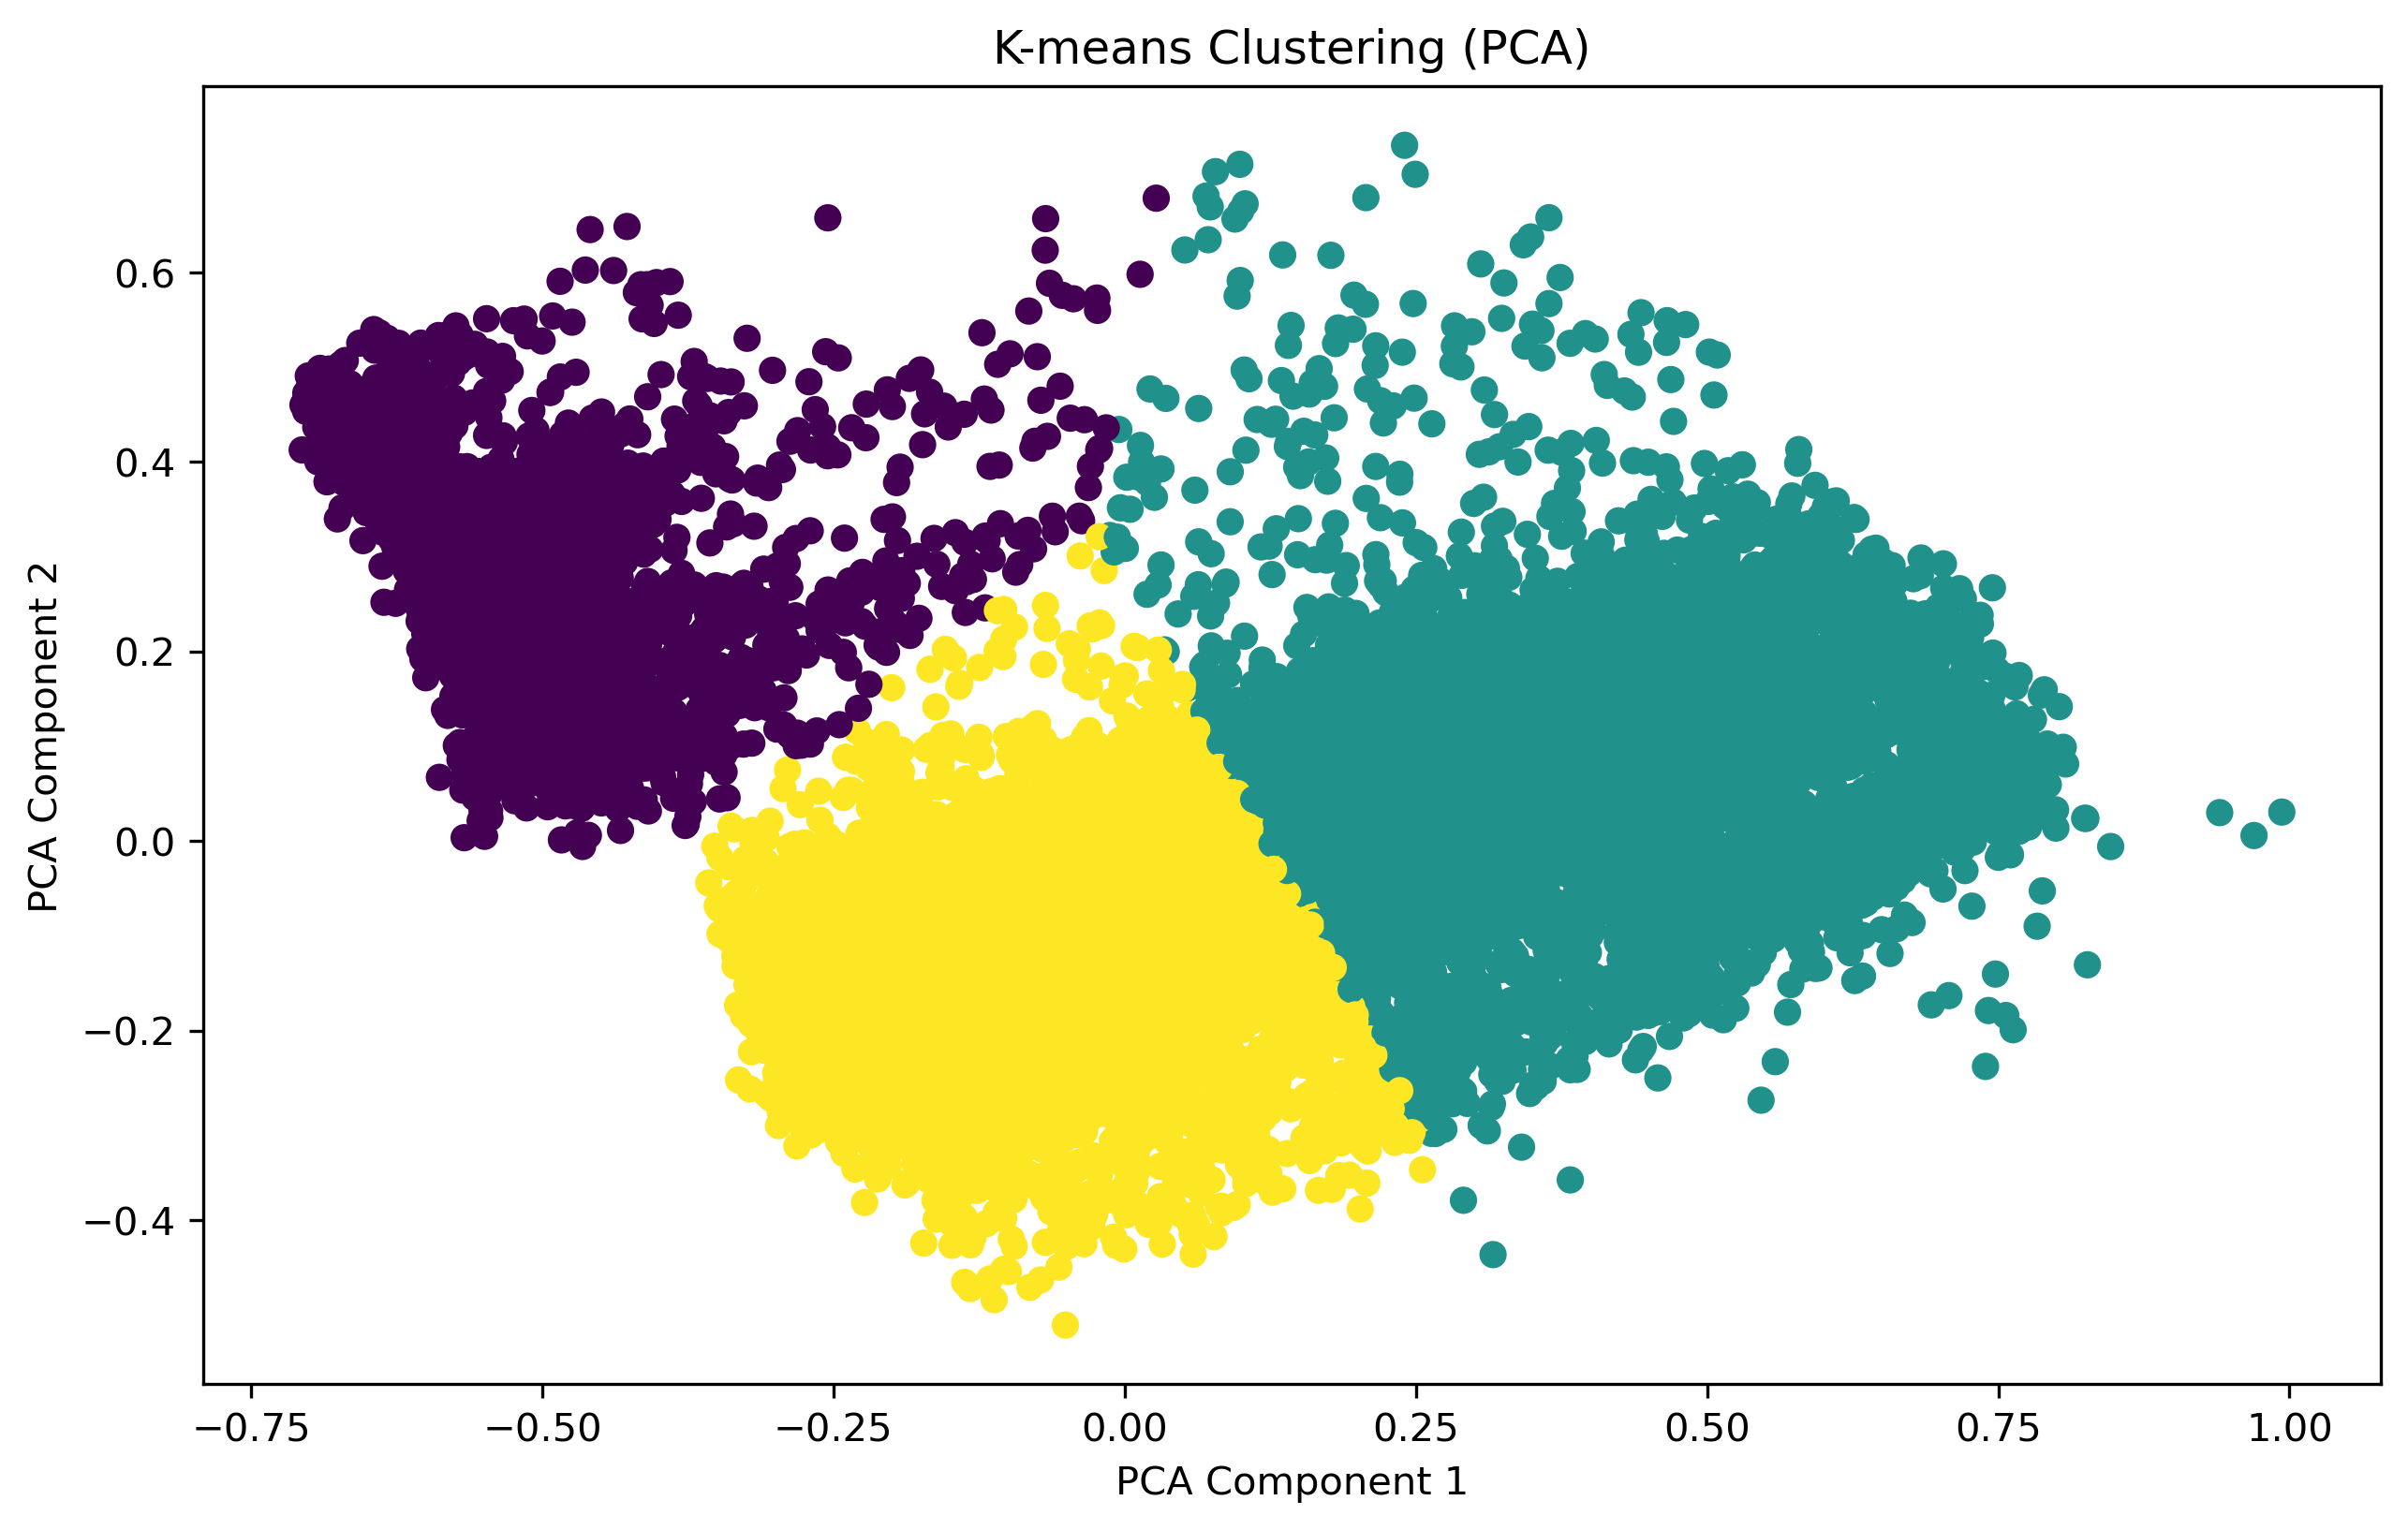

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load data set
data = pd.read_csv('F:/School/College/AILab/JupyterNotebook/GIS/Glacier/XiZang_10_20_Glacier_DE_points.csv')

# Extract feature column
# features = data[['rain_nor', 'dem_nor', 'slope_nor', 'NDVI_nor', 'evp_nor', 'SSD_nor', 'GST_nor', 'CO2_nor']]
# features = data[['rain_nor', 'dem_nor', 'slope_nor', 'NDVI_nor', 'evp_nor', 'SSD_nor', 'GST_nor']]
features = data[['rain_nor', 'slope_nor', 'NDVI_nor', 'evp_nor', 'SSD_nor', 'GST_nor']]

# Create StandardScaler objects and standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)  # 设置降维后的维数
reduced_features = pca.fit_transform(features)

# Four decimal places. Scientific notation is disabled
np.set_printoptions(precision=4, suppress=True)

# Create a DataFrame to store the feature tags and principal component weights
components = pca.components_
feature_labels = features.columns.tolist()
components_df = pd.DataFrame(components, columns=feature_labels)
print("主成分的权重:")
print(components_df)

# Initialize the K-means model and perform clustering
n_clusters = 3
kmeans = KMeans(n_clusters, random_state=3407)
kmeans.fit(reduced_features)
labels = kmeans.labels_

# Visualize the result after dimensionality reduction
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (PCA)')
plt.show()


In [2]:
# Add the 'cluster' column to the original data indicating the cluster label for each data point
data['cluster'] = labels

# Group the data by the 'cluster' column and calculate the mean and median for each feature
cluster_stats = data.groupby('cluster').agg(['mean', 'median'])[feature_labels]

print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
         rain_nor           slope_nor            NDVI_nor             evp_nor  \
             mean    median      mean    median      mean    median      mean   
cluster                                                                         
0        0.348177  0.355579  0.289505  0.280227  0.076883  0.047826  0.084866   
1        0.508817  0.511961  0.330123  0.328867  0.668062  0.656522  0.458354   
2        0.529166  0.540032  0.327251  0.319673  0.159974  0.134783  0.367493   

                    SSD_nor             GST_nor            
           median      mean    median      mean    median  
cluster                                                    
0        0.063107  0.789226  0.796359  0.351514  0.352741  
1        0.439207  0.281245  0.272801  0.497908  0.489208  
2        0.338711  0.356853  0.361075  0.415226  0.411139  


In [17]:
pca.explained_variance_ratio_

array([0.5955, 0.1857])

Profile coefficient: For a sample set, its profile coefficient is the average of the profile coefficients of all samples. The value range of contour coefficient is [-1,1]. The closer the distance between samples of the same category and samples of different categories, the higher the score.

In [2]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, labels)
print("Average Silhouette Coefficient:", silhouette_avg)

Average Silhouette Coefficient: 0.3970558277618143


Calinski-Harabasz Index (CH) : The essence of Calinski-Harabasz index is the ratio of inter-cluster distance to intra-cluster distance, and the overall calculation process is similar to the calculation of variance, so it is also called the variance ratio criterion.

In [3]:
from sklearn.metrics import calinski_harabasz_score

calinski_score = calinski_harabasz_score(features, labels)
print("Calinski-Harabasz score:", calinski_score)

Calinski-Harabasz score: 14137.287843567166


In [4]:
# Add a prediction label to the data
data['cluster_label'] = labels

# The modified data is saved
data.to_csv('XiZang_Kmeans_XDem.csv', index=False)

Davis-bouldin Index (DB) : Developed by David L. Davis and Donald Bouldin) is a clustering algorithm for evaluating metrics.
DB calculates the average sum of the in-class distance of any two classes divided by the center distance of the two classes, and finds the maximum. A smaller DB means a smaller intra-class distance and a larger inter-class distance.

In [5]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score = davies_bouldin_score(features, labels)
print("Davies-Bouldin score:", davies_bouldin_score)

Davies-Bouldin score: 0.9332938972726202


<Figure size 1000x600 with 0 Axes>

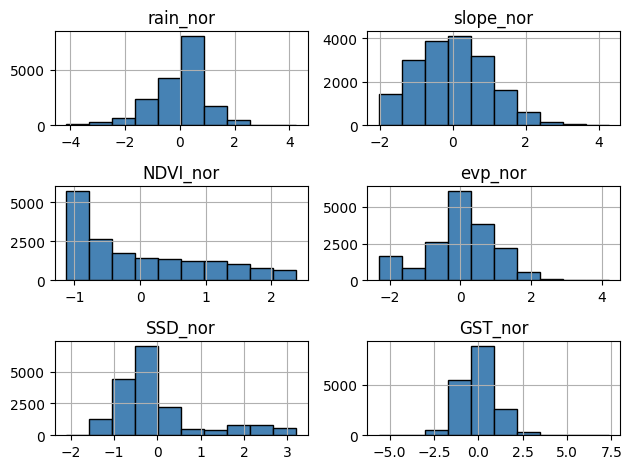

In [6]:
# Draw a histogram
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
plt.figure(figsize=(10, 6))
scaled_features_df.hist(bins=10, color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

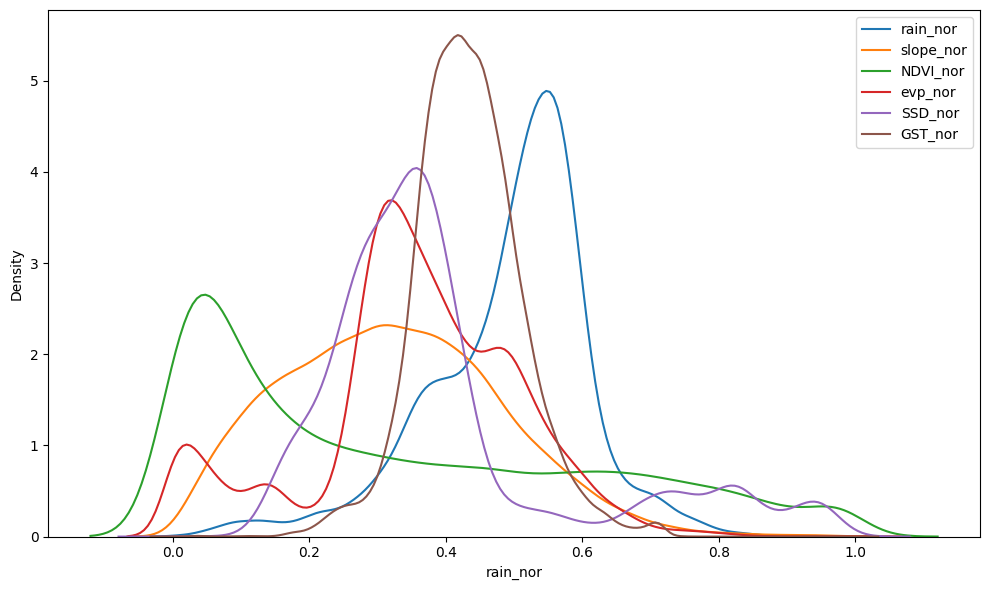

In [7]:
# Plot the kernel density estimate map
import seaborn as sns
plt.figure(figsize=(10, 6))
for feature in features.columns:
    sns.kdeplot(features[feature], label=feature)
plt.legend()
plt.tight_layout()
plt.show()

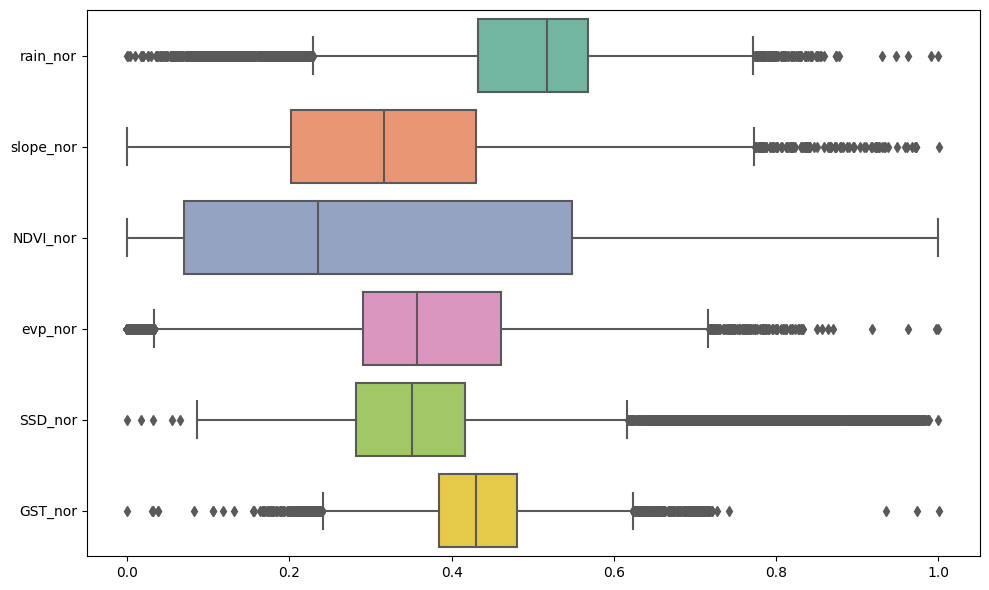

In [8]:
# Box plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=features, orient='h', palette='Set2')
plt.tight_layout()
plt.show()

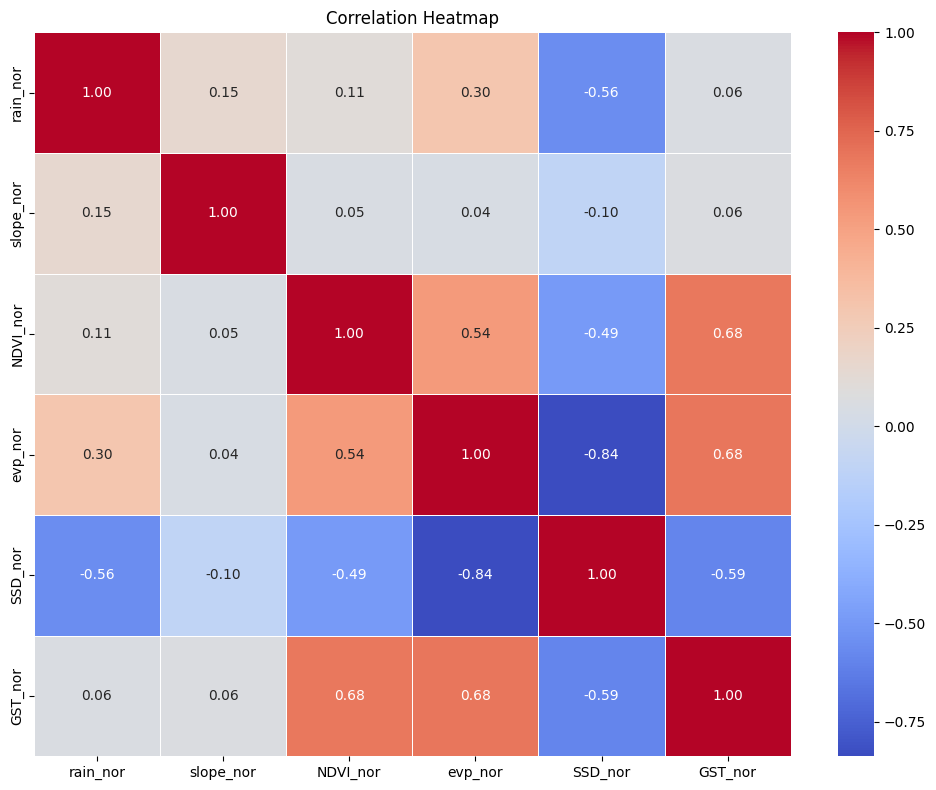

In [9]:
# Computed correlation matrix
correlation_matrix = features.corr()

# Mapping of correlation heat maps
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [10]:
import os
import numpy as np

output_dir = 'output/'

# Create output directory
os.makedirs(output_dir, exist_ok=True)

feature_names = features.columns

# Manually specify three label colors
colors = ['darkorange', 'darkcyan', 'mediumorchid']

for i, feature1 in enumerate(feature_names):
    for j, feature2 in enumerate(feature_names):
        fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

        # Gets the color label corresponding to the current feature
        current_labels = labels

        # Creates an array of integers to specify colors
        color_labels = np.zeros(len(current_labels), dtype=np.object)
        color_labels[current_labels == 0] = colors[0]
        color_labels[current_labels == 1] = colors[1]
        color_labels[current_labels == 2] = colors[2]

        ax.scatter(features[feature1], features[feature2], c=color_labels)
        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        plt.tight_layout()

        # Specify the save path and file name
        save_path = os.path.join(output_dir, f"{feature1}_{feature2}_scatter.png")
        plt.savefig(save_path, dpi=300)
        plt.close()


C:\Users\86151\AppData\Local\Temp\ipykernel_22192\4073503441.py:22: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color_labels = np.zeros(len(current_labels), dtype=np.object)


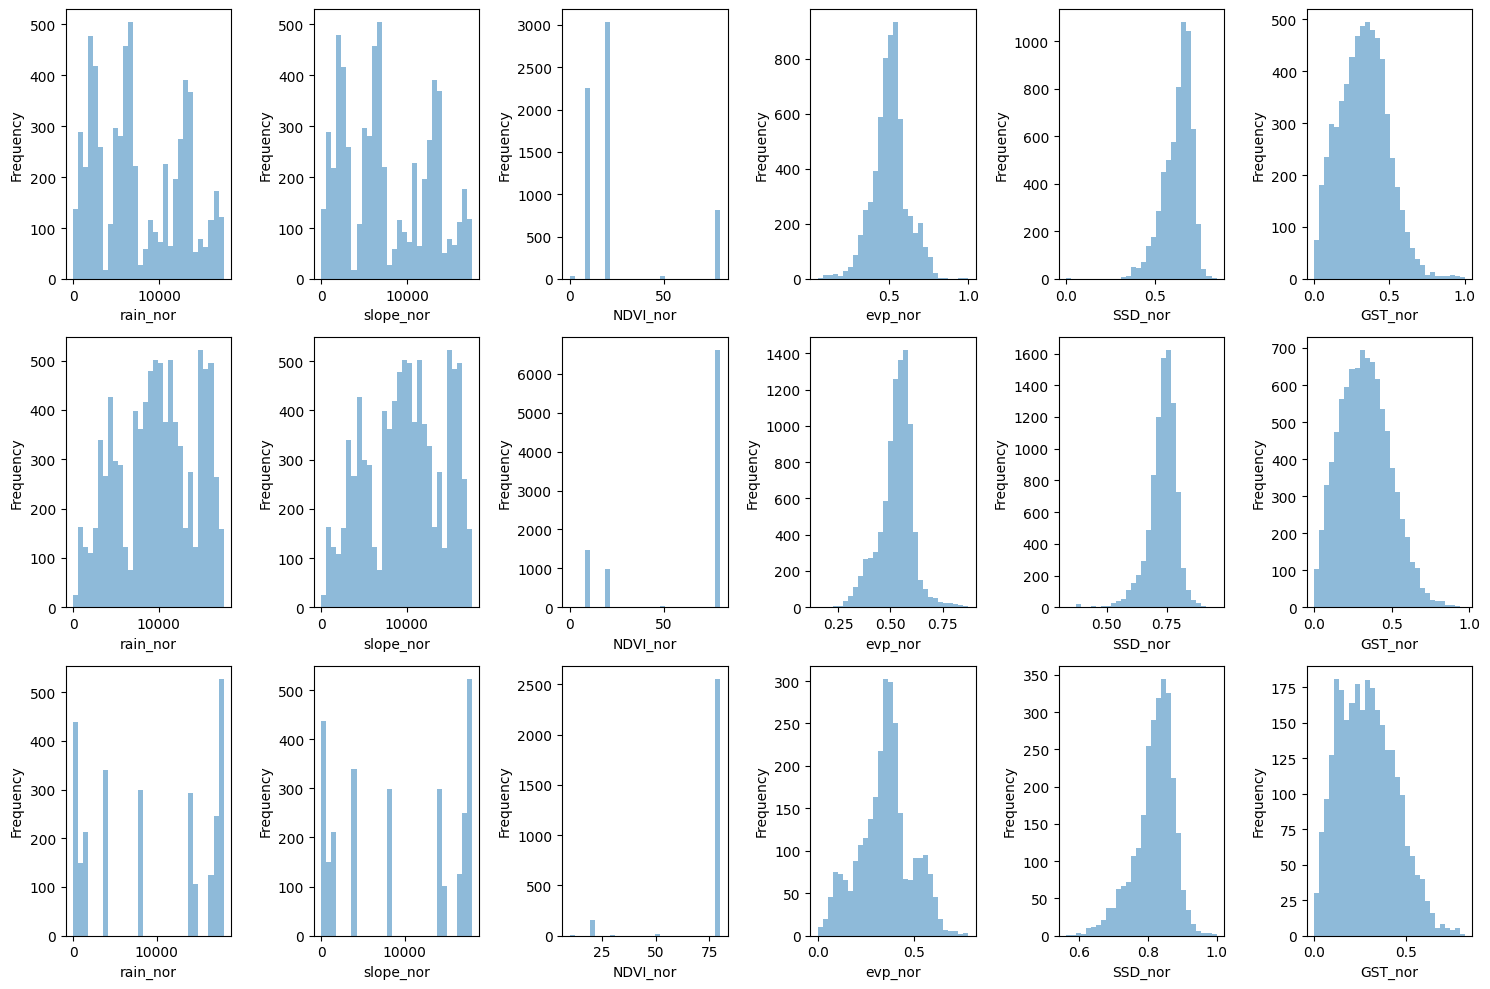

In [11]:
# Adds the label to the data set
data['Cluster'] = labels

# Plot the distribution of each cluster in each variable
num_features = len(features.columns)
num_clusters = len(data['Cluster'].unique())

fig, axes = plt.subplots(num_clusters, num_features, figsize=(15, 10))

for i in range(num_clusters):
    cluster_data = data[data['Cluster'] == i]
    for j in range(num_features):
        axes[i, j].hist(cluster_data.iloc[:, j], bins=30, alpha=0.5)
        axes[i, j].set_xlabel(features.columns[j])
        axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

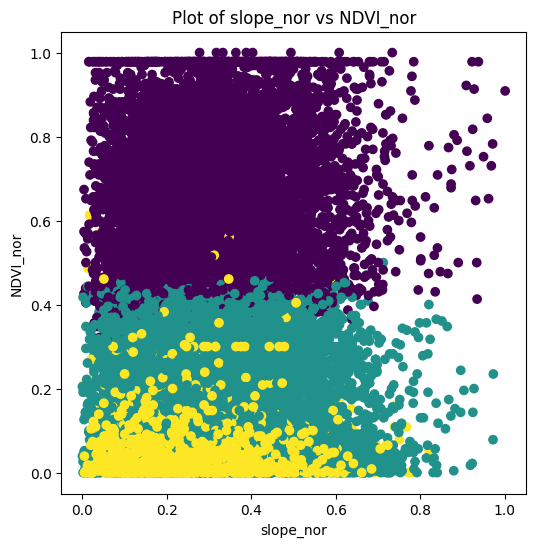

In [12]:
i = 2  # the ith row
j = 3  # the jth column

i=i-1
j=j-1

plt.figure(figsize=(6, 6))
plt.scatter(features[feature_names[i]], features[feature_names[j]], c=labels)
plt.xlabel(feature_names[i])
plt.ylabel(feature_names[j])
plt.title(f'Plot of {feature_names[i]} vs {feature_names[j]}')
plt.show()

**The number of clusters was obtained by elbow method**

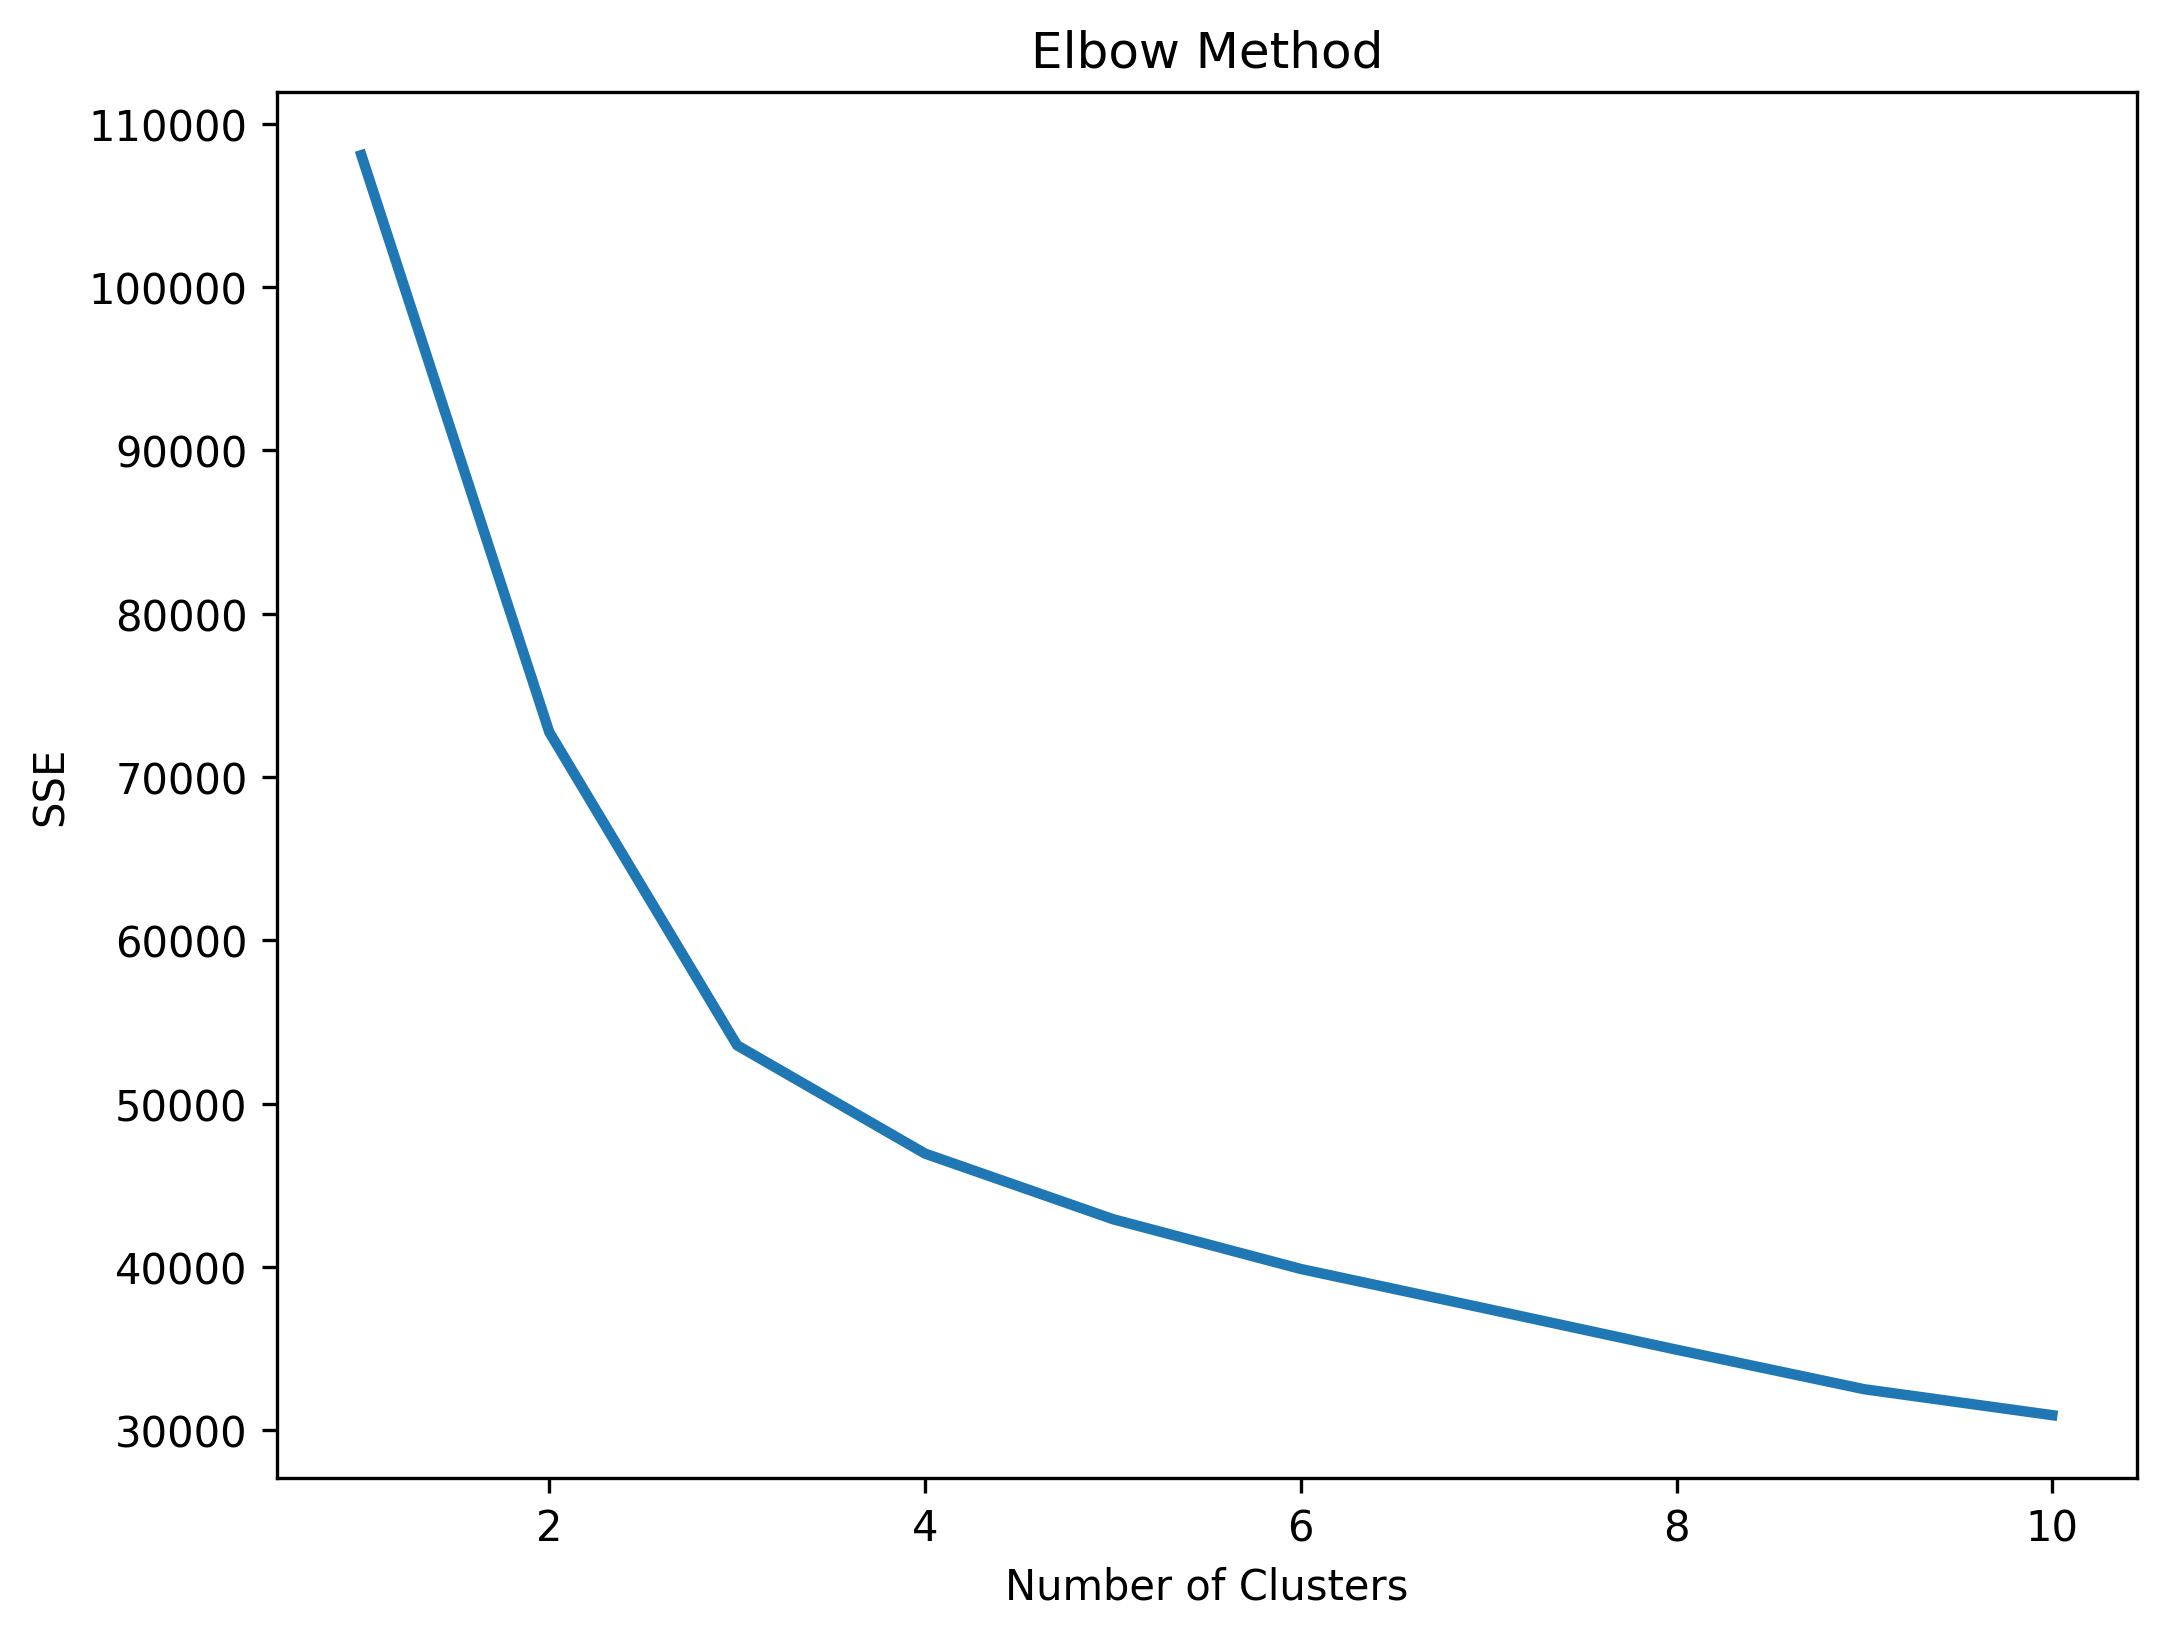

In [13]:
# # Calculate SSE for different cluster numbers
# sse = []
# for k in range(1, 11):  # Suppose to try a maximum of 10 clusters
#     kmeans = KMeans(n_clusters=k, random_state=3407)
#     kmeans.fit(scaled_features)
#     sse.append(kmeans.inertia_)

# # Plot the SSE change curve
# plt.plot(range(1, 11), sse)
# plt.xlabel('Number of Clusters')
# plt.ylabel('SSE')
# plt.title('Elbow Method')
# plt.show()

sse = []
for k in range(1, 11):  # Suppose to try a maximum of 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=3407)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(range(1, 11), sse, linewidth=2.5)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

**轮廓系数获得簇数**

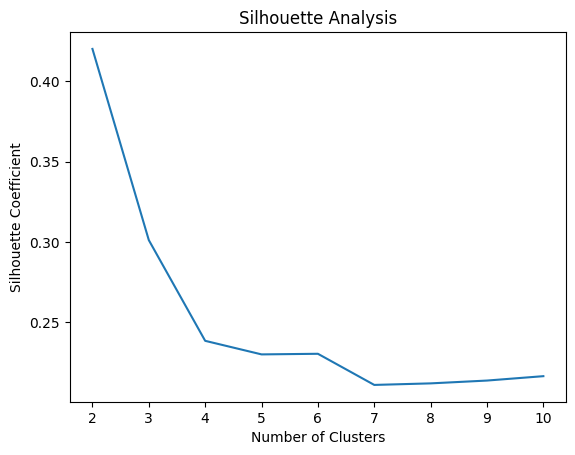

In [14]:
# Calculate the contour coefficients under different cluster numbers
silhouette_scores = []
for k in range(2, 11):  # Suppose to try 2 to 10 cluster numbers
    kmeans = KMeans(n_clusters=k, random_state=3407)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plot the variation curve of contour coefficient
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Analysis')
plt.show()

In [15]:
gridCode = data[['grid_code']]

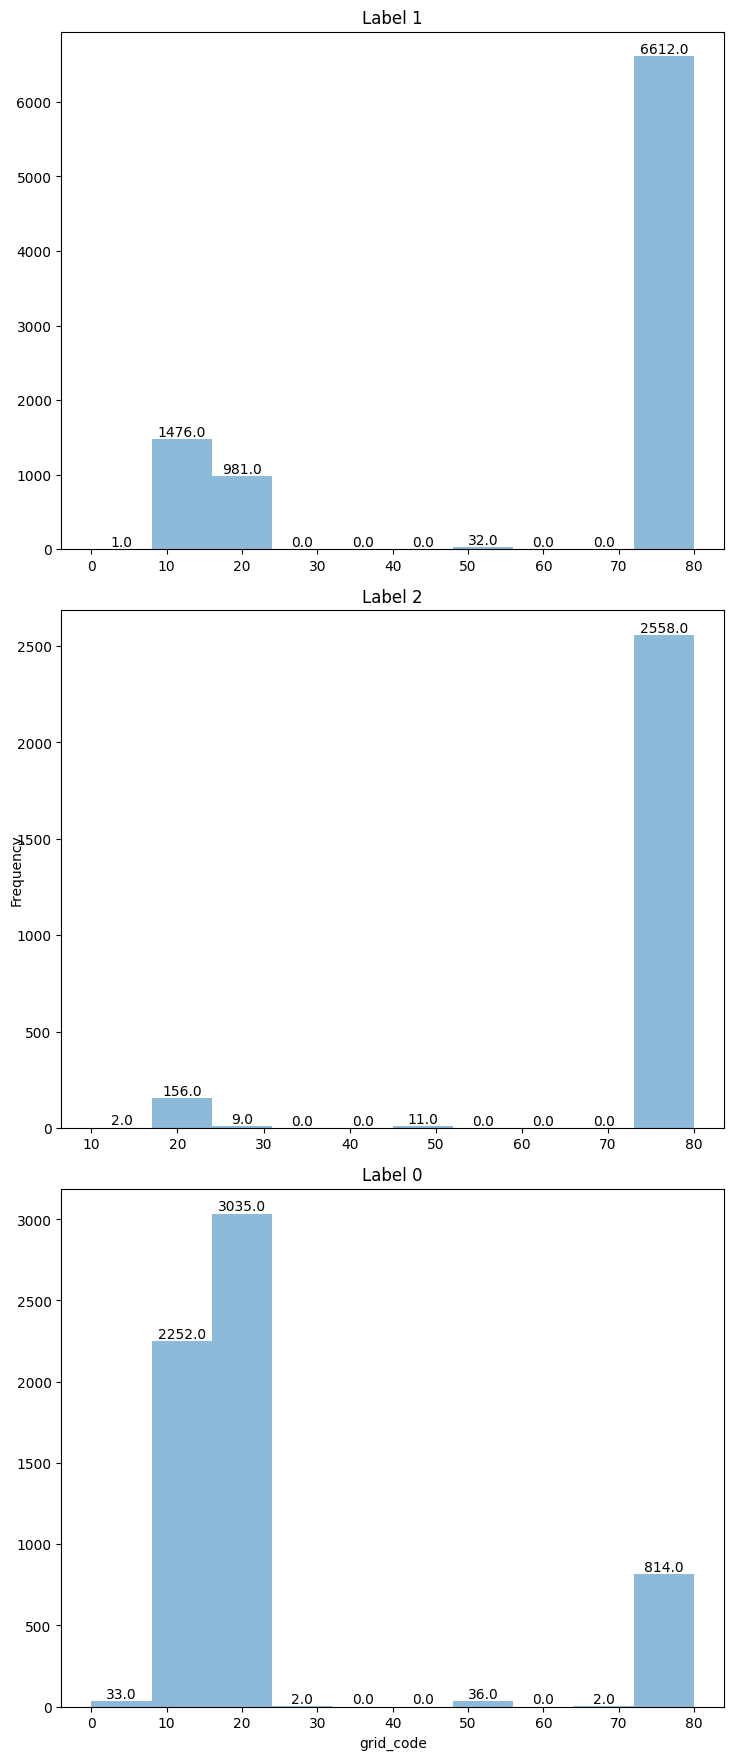

In [16]:
# Gets a unique tag value
labels = data['cluster_label'].unique()

# Create a subgraph that contains a histogram for each label
fig, axes = plt.subplots(len(labels), 1, figsize=(8, 6*len(labels)))

# Iterate through each label
for i, label in enumerate(labels):
    # Gets the data subset of the corresponding label
    subset = data[data['cluster_label'] == label]
    
    # Draw a histogram
    n, bins, patches = axes[i].hist(subset['grid_code'], bins=10, alpha=0.5)
    axes[i].set_title(f'Label {label}')
    
    # Add a value to each column
    for value, patch in zip(n, patches):
        height = patch.get_height()
        axes[i].text(patch.get_x() + patch.get_width() / 2, height, value,
                     ha='center', va='bottom')
    
# Add shared X-axis labels and overall titles
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('grid_code')
plt.ylabel('Frequency')

# Adjust the spacing between subgraphs
plt.tight_layout()

# show
plt.show()